# **REGRESSION**


#1)Choose; Load; Inspect and Explore your Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importing numpy, pandas, matplotlib and seaborn

In [ ]:
df=pd.read_csv("car data.csv")

This dataset is from kaggle and it is a dataset of vehicle

Head of the dataset

In [ ]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


to display the first five row of the dataset starting from 0

Shape of the dataset

In [ ]:
df.shape

(301, 9)

attribute of a dataframe(df) that returns tuple representing the dimensions of the DataFrame

Summary of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


it provides the concise summary of the DataFrame(df)

In [ ]:
df.describe(include='all')


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


it provides the descriptive summary of the dataframe including the numeric and non-numeric columns.

Missing values in the dataset

In [ ]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

it is used to count the number of missing values in each column of Dataframe.

Data Preparation

Feature Subset Selection

In [ ]:
df['Car_Name'].nunique()

98

It is used to count the number of unique values in the column named Car_name

Since name contains 1491 unique categories, and this number of categories is very high compared to the number of dataset samples, it is better to drop it

In [ ]:
df.drop('Car_Name', axis=1, inplace=True)

this command in panda is to remove the column named Car_name from dataframe

Feature Transformation

"Year" shows the car model year. We can replace this column with the cars age attribute.To calculate the age, we consider the origin time to be 1 year older than the maximum model year:

In [ ]:
df.head(5)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


to display the first five row of the dataset starting from 0


In [ ]:
df.insert(0, "Age", df["Year"].max()+1-df["Year"] )
df.drop('Year', axis=1, inplace=True)
df.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0


inserts a new column age at the beginning of the index(0) of the dataframe

Removes the column name Year from the dataframe

Outlier Detection

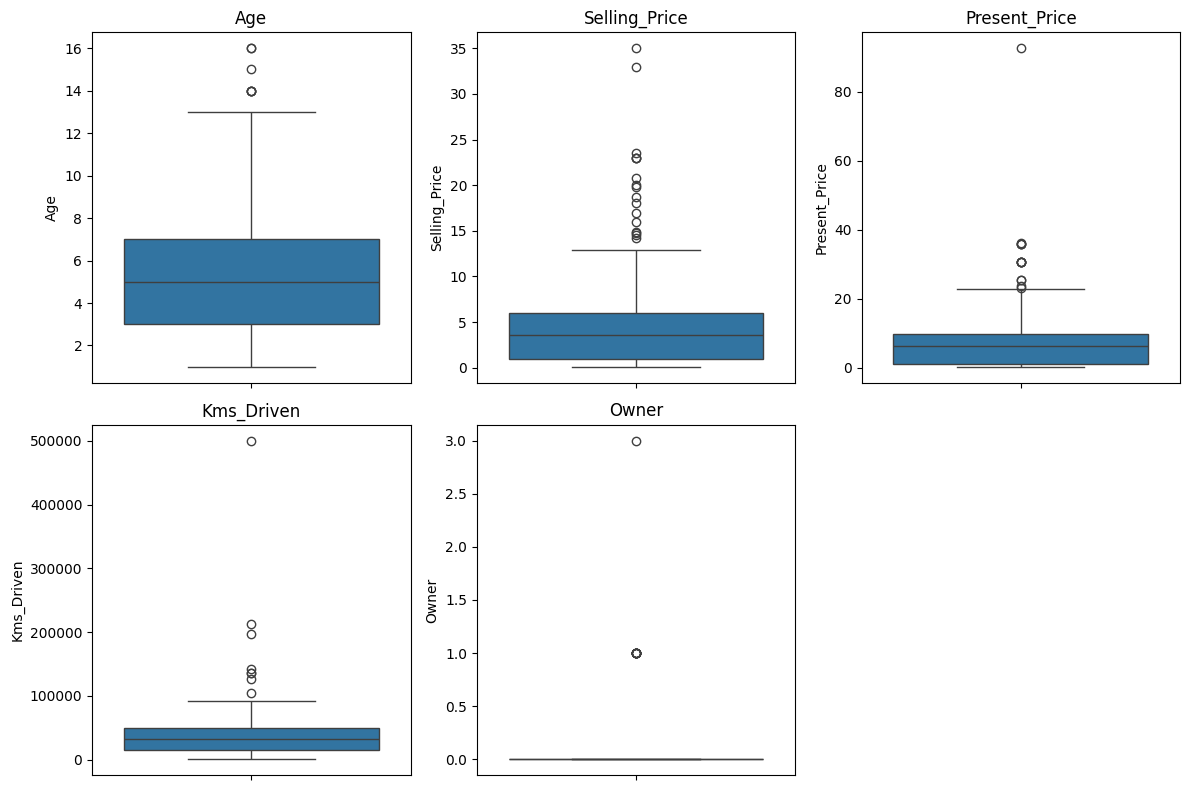

In [ ]:
# Create box plots for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns  # Select numerical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)  # Adjust subplot layout as needed
    sns.boxplot(y=df[col])  # Switched x to y for horizontal box plots
    plt.title(col)
plt.tight_layout()
plt.show()

This code snippet creates box plots for numerical columns in the dataframe df using matplotlib and seaborn libraries. The Outliners can be detected for different columns from the box plot figure given above.

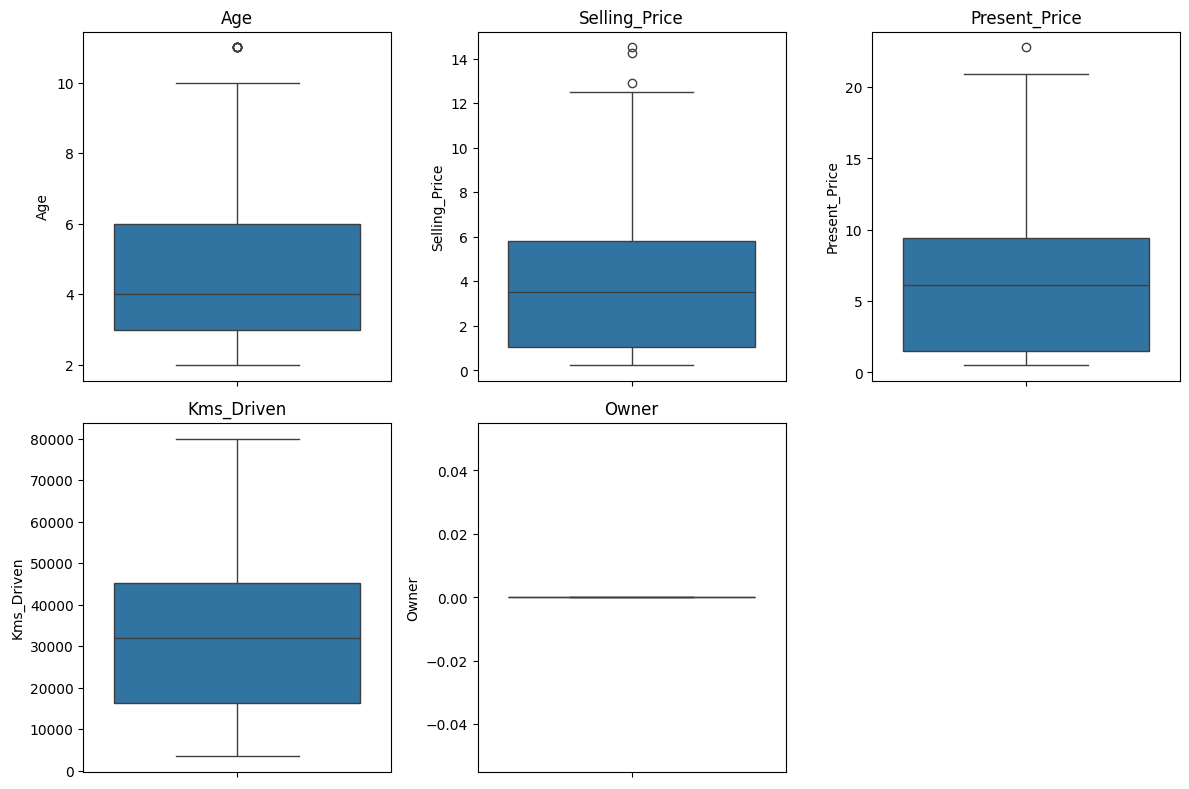

      Age  Selling_Price  Present_Price  Kms_Driven  Owner  Fuel_Type_Diesel  \
0     5.0           3.35           5.59     27000.0    0.0               NaN   
1     6.0           4.75           9.54     43000.0    0.0               NaN   
2     2.0           7.25           9.85      6900.0    0.0               NaN   
3     8.0           2.85           4.15      5200.0    0.0               NaN   
4     5.0           4.60           6.87     42450.0    0.0               NaN   
..    ...            ...            ...         ...    ...               ...   
296   3.0           9.50          11.60     33988.0    0.0               NaN   
297   4.0           4.00           5.90     60000.0    0.0               NaN   
298  10.0           3.35          11.00         NaN    0.0               NaN   
299   2.0          11.50          12.50      9000.0    0.0               NaN   
300   3.0           5.30           5.90      5464.0    0.0               NaN   

     Fuel_Type_Petrol  Seller_Type_Indi

In [ ]:
# Define numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the lower and upper bounds for outliers
lower_bound = 0.05  # 5th percentile
upper_bound = 0.95  # 95th percentile

# Filter the DataFrame to remove outliers
df = df[(df[numerical_columns] >= df[numerical_columns].quantile(lower_bound)) &
                    (df[numerical_columns] <= df[numerical_columns].quantile(upper_bound))]

# Reset the index of the resulting DataFrame
df.reset_index(drop=True, inplace=True)

# Create box plots for numerical columns after removing outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])  # Use the DataFrame without outliers
    plt.title(col)
plt.tight_layout()
plt.show()

# Display the DataFrame without outliers
print(df)

This code snippets performs the task like defining the numerical columns, calculates the lower and upper bounds for outliners, filters the dataframe to remove the outliners, resets the index of the resulting df, creates the box plots for numerical columns after removing the outliners and displays the dataframe without outliners.

Discover Duplicates

In [ ]:
df[df.duplicated(keep=False)]

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
15,3,7.75,10.79,43000,Diesel,Dealer,Manual,0
17,3,7.75,10.79,43000,Diesel,Dealer,Manual,0
51,4,23.00,30.61,40000,Diesel,Dealer,Automatic,0
93,4,23.00,30.61,40000,Diesel,Dealer,Automatic,0


Since it is possible to have cars with the same features, we do not drop duplicates.

Data Visualization

Categorical Variables Univariate Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


it provides the concise summary of the DataFrame(df)

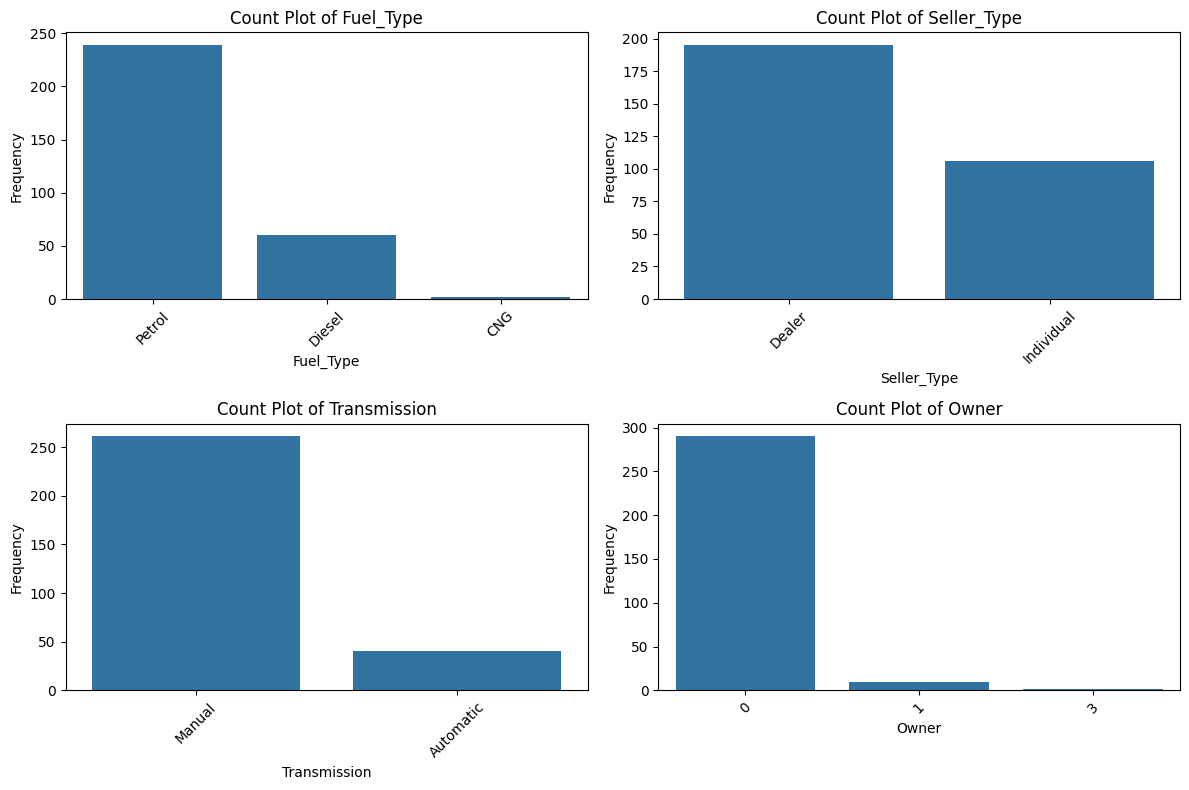

In [ ]:
# Define categorical columns
categorical_columns = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

# Create count plots for each categorical variable
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This code snippet generates count plots for each categorial variable in the dataframe.

Numerical Variables Univariate Analysis

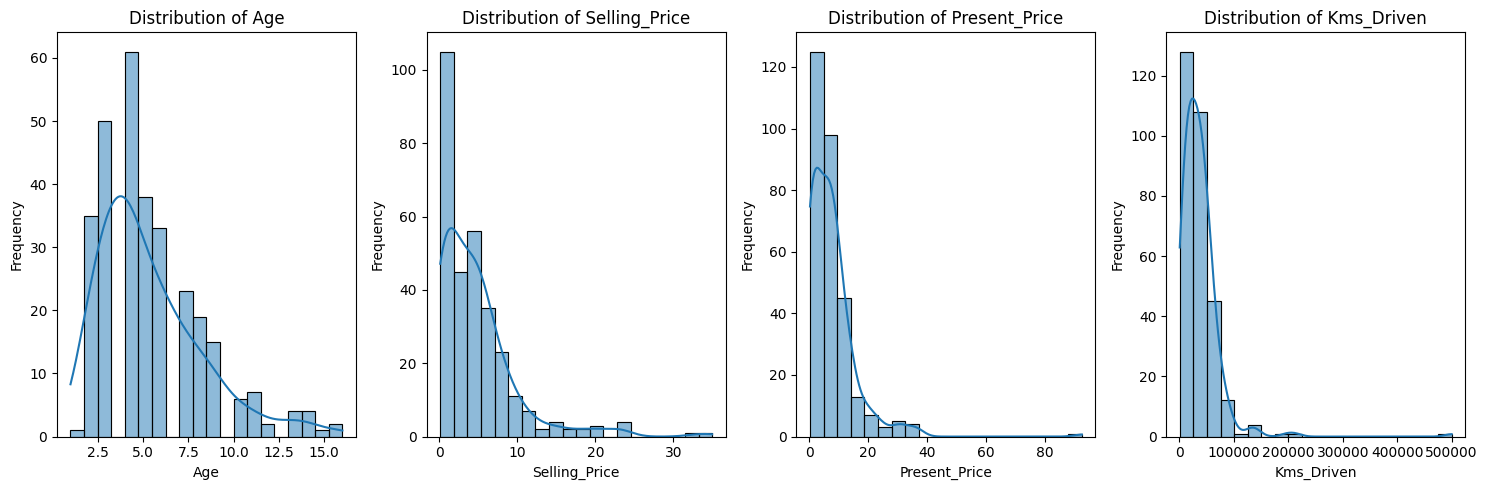

In [ ]:
# Select numerical columns for univariate analysis
numerical_columns = ['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven']

# Perform univariate analysis for each numerical column
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 4, i)
    sns.histplot(df[col], kde=True, bins=20)  # Plot histogram with kernel density estimate
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Histogram of selling_price ,present_price is positively skewed

This code snippet performs univariate analysis for each numerical column in the DataFrame. Univariate analysis with histograms and Univariate analysis with box plots. Both sections of the code use 'plt.tight_layout()' to adjust the layout of the subplots to prevent overlapping and 'plt.show()' to display the plots.

Target vs. Numerical Features Bivariate Analysis

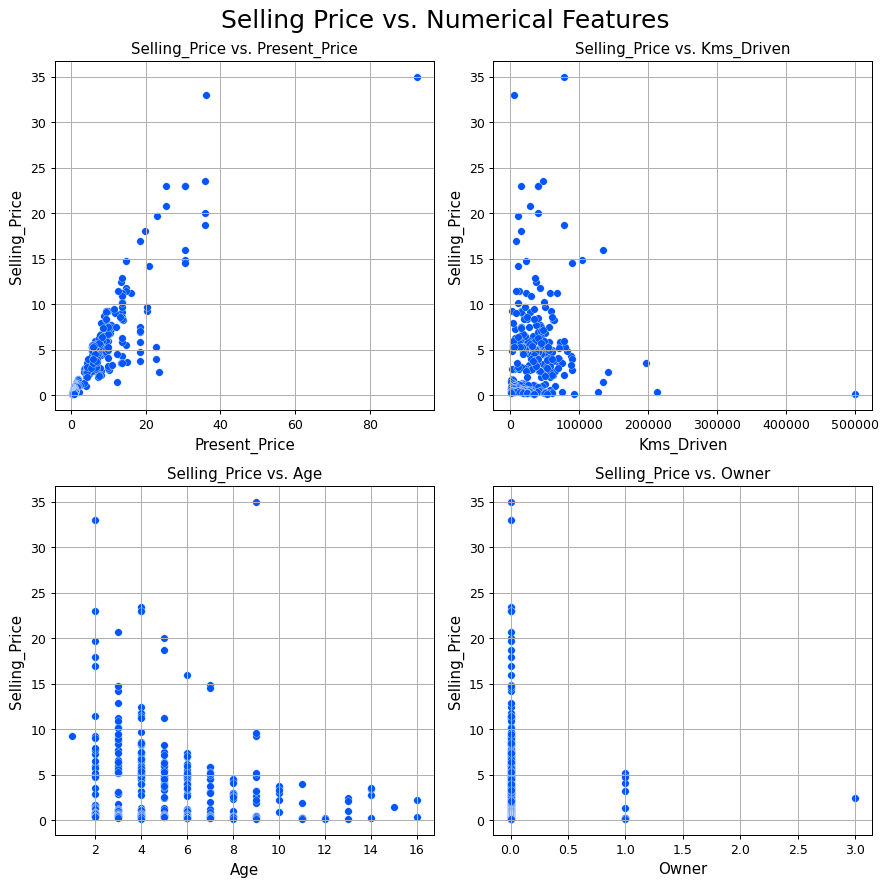

In [ ]:
fig, ax = plt.subplots(nrows=2 ,ncols=2, figsize=(10,10), dpi=90)
num_features = ['Present_Price', 'Kms_Driven', 'Age', 'Owner']
target = 'Selling_Price'
c = '#0055ff'

for i, feature in enumerate(num_features):
    row = i // 2
    col = i % 2
    ax[row, col].scatter(df[feature], df[target], color=c, edgecolors='w', linewidths=0.25)
    ax[row, col].set_title('{} vs. {}'.format(target, feature), size=12)
    ax[row, col].set_xlabel(feature, size=12)
    ax[row, col].set_ylabel(target, size=12)
    ax[row, col].grid()

plt.suptitle('Selling Price vs. Numerical Features', size=20)
plt.tight_layout()
plt.show()


Conclusion:

Selling_Price rises in line with Present_Price. Thus, Selling Price and Present Price are exactly proportionate.

The car's Selling Price falls as its Kms_Driven rises. Thus, the relationship between Selling Price and Kms Driven is inverse.

The car's Selling_Price drops with age. Thus, Selling Price and Car Age have an inverse relationship.

The Selling Price of an automobile declines as the number of prior owners rises. In other words, Selling Price is inversely related to Owner.


Target vs. Categorical Features Bivariate Analysis

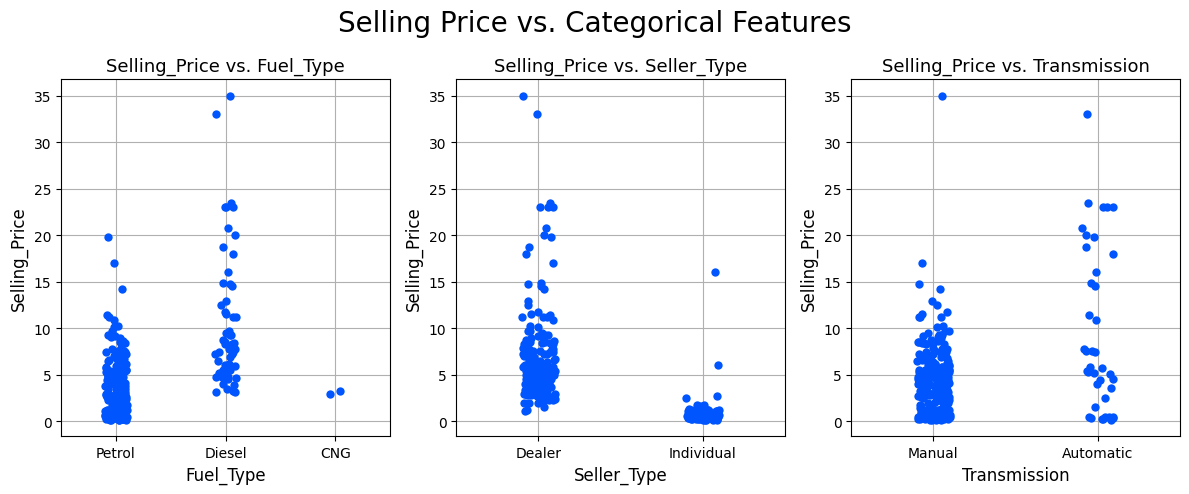

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5), dpi=100)
cat_features = ['Fuel_Type', 'Seller_Type', 'Transmission']
target = 'Selling_Price'
c = '#0055ff'

for i, feature in enumerate(cat_features):
    sns.stripplot(ax=axes[i], x=feature, y=target, data=df, size=6, color=c)
    axes[i].set_title('{} vs. {}'.format(target, feature), size=13)
    axes[i].set_xlabel(feature, size=12)
    axes[i].set_ylabel(target, size=12)
    axes[i].grid()

plt.suptitle('Selling Price vs. Categorical Features', size=20)
plt.tight_layout()
plt.show()


Conclusion:

In terms of selling price, petrol cars are inferior to diesel cars. automobiles sold by private sellers typically have a lower Selling Price than automobiles sold by dealers. Compared to manual autos, automatic cars are more expensive.

Categorical Variables Encoding

We implement dummy encoding on categorical columns, since they are all nominal variables:

In [ ]:
# Define categorical columns
CatCols = ['Fuel_Type', 'Seller_Type', 'Transmission']

# Perform one-hot encoding
df = pd.get_dummies(df, columns=CatCols, drop_first=True)

# Display the first few rows of the modified dataframe
print(df.head())

   Age  Selling_Price  Present_Price  Kms_Driven  Owner  Fuel_Type_Diesel  \
0    5           3.35           5.59       27000      0                 0   
1    6           4.75           9.54       43000      0                 1   
2    2           7.25           9.85        6900      0                 0   
3    8           2.85           4.15        5200      0                 0   
4    5           4.60           6.87       42450      0                 1   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                 1                       0                    1  
1                 0                       0                    1  
2                 1                       0                    1  
3                 1                       0                    1  
4                 0                       0                    1  


One-hot encoding is a technique used to convert categorical variables into a binary representation, where each category becomes a new binary column.

Correlation Analysis

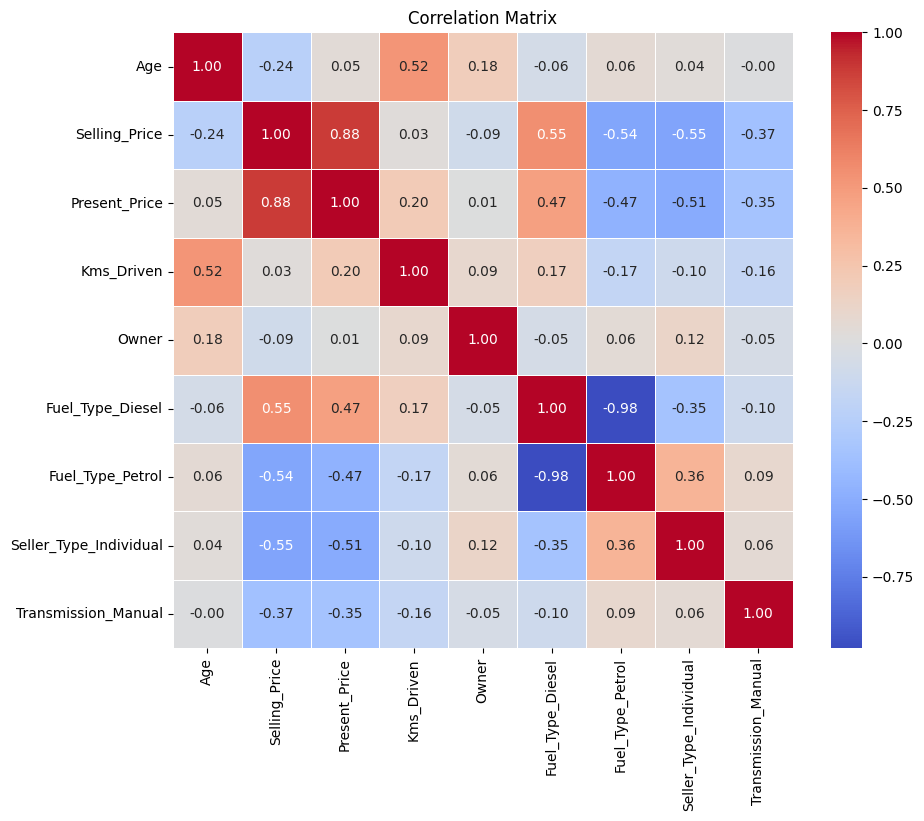

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Target variables "Selling Price" and Present_Price, Seller_Type, and Fuel_Type have a strong correlation.Owner and owner has  Pearson correlation coefficient 0 so it has no relation with eachother at all
It is known as multicollinearity when certain independent variables, such as Fuel Type Diesel and Fuel Type Petrol, exhibit strong correlations.

#2)Build Primary Model

**split the dataset into train and test sets**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Splitting the dataset into train and test sets
X = df.drop('Selling_Price', axis=1)  # Features
y = df['Selling_Price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Building Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Building Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:

# Evaluating models on the test dataset
gb_predictions = gb_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Calculating Root Mean Squared Error (RMSE)
gb_rmse = mean_squared_error(y_test, gb_predictions, squared=False)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)

print("Root Mean Squared Error (RMSE) for Gradient Boosting Regression(testing set):", gb_rmse)
print("Root Mean Squared Error (RMSE) for Random Forest Regression(testing set):", rf_rmse)


Root Mean Squared Error (RMSE) for Gradient Boosting Regression(testing set): 0.85695190702919
Root Mean Squared Error (RMSE) for Random Forest Regression(testing set): 0.952065233420759


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error, median_absolute_error, explained_variance_score

# Calculate additional evaluation metrics
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
gb_msle = mean_squared_log_error(y_test, gb_predictions)
gb_median_abs_error = median_absolute_error(y_test, gb_predictions)
gb_explained_variance = explained_variance_score(y_test, gb_predictions)

rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
rf_msle = mean_squared_log_error(y_test, rf_predictions)
rf_median_abs_error = median_absolute_error(y_test, rf_predictions)
rf_explained_variance = explained_variance_score(y_test, rf_predictions)

# Print evaluation metrics for Gradient Boosting Regression
print("Evaluation Metrics for Gradient Boosting Regression(testing set):")
print("Mean Absolute Error (MAE):", gb_mae)
print("R-squared (R2):", gb_r2)
print("Mean Squared Logarithmic Error (MSLE):", gb_msle)
print("Median Absolute Error:", gb_median_abs_error)
print("Explained Variance Score:", gb_explained_variance)
print("Root Mean Squared Error (RMSE):", gb_rmse)
print()

# Print evaluation metrics for Random Forest Regression
print("Evaluation Metrics for Random Forest Regression(testing set):")
print("Mean Absolute Error (MAE):", rf_mae)
print("R-squared (R2):", rf_r2)
print("Mean Squared Logarithmic Error (MSLE):", rf_msle)
print("Median Absolute Error:", rf_median_abs_error)
print("Explained Variance Score:", rf_explained_variance)
print("Root Mean Squared Error (RMSE):", rf_rmse)


Evaluation Metrics for Gradient Boosting Regression(testing set):
Mean Absolute Error (MAE): 0.5651829334148778
R-squared (R2): 0.9681203413651553
Mean Squared Logarithmic Error (MSLE): 0.017123860571871718
Median Absolute Error: 0.26885624998654745
Explained Variance Score: 0.9690189372485575
Root Mean Squared Error (RMSE): 0.85695190702919

Evaluation Metrics for Random Forest Regression(testing set):
Mean Absolute Error (MAE): 0.6375393442622954
R-squared (R2): 0.9606509568754323
Mean Squared Logarithmic Error (MSLE): 0.021730741380462153
Median Absolute Error: 0.35799999999999965
Explained Variance Score: 0.9609782859940821
Root Mean Squared Error (RMSE): 0.952065233420759


In [ ]:
# Evaluating models on the training dataset
gb_train_predictions = gb_model.predict(X_train)
rf_train_predictions = rf_model.predict(X_train)

# Calculating Root Mean Squared Error (RMSE) for training set
gb_train_rmse = mean_squared_error(y_train, gb_train_predictions, squared=False)
rf_train_rmse = mean_squared_error(y_train, rf_train_predictions, squared=False)

# Print RMSE for training set
print("Root Mean Squared Error (RMSE) for Gradient Boosting Regression (Training Set):", gb_train_rmse)
print("Root Mean Squared Error (RMSE) for Random Forest Regression (Training Set):", rf_train_rmse)

# Calculate additional evaluation metrics for training set
gb_train_mae = mean_absolute_error(y_train, gb_train_predictions)
gb_train_r2 = r2_score(y_train, gb_train_predictions)
gb_train_msle = mean_squared_log_error(y_train, gb_train_predictions)
gb_train_median_abs_error = median_absolute_error(y_train, gb_train_predictions)
gb_train_explained_variance = explained_variance_score(y_train, gb_train_predictions)

rf_train_mae = mean_absolute_error(y_train, rf_train_predictions)
rf_train_r2 = r2_score(y_train, rf_train_predictions)
rf_train_msle = mean_squared_log_error(y_train, rf_train_predictions)
rf_train_median_abs_error = median_absolute_error(y_train, rf_train_predictions)
rf_train_explained_variance = explained_variance_score(y_train, rf_train_predictions)

# Print evaluation metrics for Gradient Boosting Regression on training set
print("\nEvaluation Metrics for Gradient Boosting Regression (Training Set):")
print("Mean Absolute Error (MAE):", gb_train_mae)
print("R-squared (R2):", gb_train_r2)
print("Mean Squared Logarithmic Error (MSLE):", gb_train_msle)
print("Median Absolute Error:", gb_train_median_abs_error)
print("Explained Variance Score:", gb_train_explained_variance)
print("Root Mean Squared Error (RMSE):", gb_train_rmse)
print()

# Print evaluation metrics for Random Forest Regression on training set
print("Evaluation Metrics for Random Forest Regression (Training Set):")
print("Mean Absolute Error (MAE):", rf_train_mae)
print("R-squared (R2):", rf_train_r2)
print("Mean Squared Logarithmic Error (MSLE):", rf_train_msle)
print("Median Absolute Error:", rf_train_median_abs_error)
print("Explained Variance Score:", rf_train_explained_variance)
print("Root Mean Squared Error (RMSE):", rf_train_rmse)


Root Mean Squared Error (RMSE) for Gradient Boosting Regression (Training Set): 0.31816751626076106
Root Mean Squared Error (RMSE) for Random Forest Regression (Training Set): 0.6086232297502837

Evaluation Metrics for Gradient Boosting Regression (Training Set):
Mean Absolute Error (MAE): 0.2306675283054574
R-squared (R2): 0.9961708835802572
Mean Squared Logarithmic Error (MSLE): 0.0035024760831792014
Median Absolute Error: 0.15819186664803997
Explained Variance Score: 0.9961708835802572
Root Mean Squared Error (RMSE): 0.31816751626076106

Evaluation Metrics for Random Forest Regression (Training Set):
Mean Absolute Error (MAE): 0.25849624999999965
R-squared (R2): 0.9859885221660173
Mean Squared Logarithmic Error (MSLE): 0.0038282059560512814
Median Absolute Error: 0.11224999999999952
Explained Variance Score: 0.9859885554999684
Root Mean Squared Error (RMSE): 0.6086232297502837


* 		Mean Absolute Error (MAE):
    * Gradient Boosting Regression: 0.565
    * Random Forest Regression: 0.638
    * Lower MAE indicates better performance, so Gradient Boosting Regression performed better in terms of MAE.
* 		R-squared (R2):
    * Gradient Boosting Regression: 0.968
    * Random Forest Regression: 0.961
    * Higher R-squared values indicate better fit to the data, so Gradient Boosting Regression performed slightly better in terms of R-squared.
* 		Mean Squared Logarithmic Error (MSLE):
    * Gradient Boosting Regression: 0.017
    * Random Forest Regression: 0.022
    * Lower MSLE values indicate better performance, so Gradient Boosting Regression performed better in terms of MSLE.
* 		Median Absolute Error:
    * Gradient Boosting Regression: 0.269
    * Random Forest Regression: 0.358
    * Lower median absolute error indicates better performance, so Gradient Boosting Regression performed better in terms of median absolute error.
* 		Explained Variance Score:
    * Gradient Boosting Regression: 0.969
    * Random Forest Regression: 0.961
    * Higher explained variance score indicates better performance, so Gradient Boosting Regression performed slightly better in terms of explained variance.
* 		Root Mean Squared Error (RMSE):
    * Gradient Boosting Regression: 0.857
    * Random Forest Regression: 0.952
    * Lower RMSE values indicate better performance, so Gradient Boosting Regression performed better in terms of RMSE.
In comparison to the Random Forest Regression model, the Gradient Boosting Regression model outperformed it overall on the dataset based on these findings and all evaluation measures. For this dataset, the Gradient Boosting Regression model is recommended.

#3)Hyper-parameter Optimization with Cross-Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters grid for Gradient Boosting Regression
gb_param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Hyperparameters grid for Random Forest Regression
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for Gradient Boosting Regression
gb_grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                              param_grid=gb_param_grid,
                              cv=5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              verbose=2)

# GridSearchCV for Random Forest Regression
rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=rf_param_grid,
                              cv=5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              verbose=2)

# Fit the models
gb_grid_search.fit(X_train, y_train)
rf_grid_search.fit(X_train, y_train)

# Best hyperparameters for Gradient Boosting Regression
best_gb_params = gb_grid_search.best_params_

# Best hyperparameters for Random Forest Regression
best_rf_params = rf_grid_search.best_params_

print("Best Hyperparameters for Gradient Boosting Regression:", best_gb_params)
print("Best Hyperparameters for Random Forest Regression:", best_rf_params)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters for Gradient Boosting Regression: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Hyperparameters for Random Forest Regression: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


This output shows the outcomes of the GridSearchCV hyperparameter optimization procedure for the Random Forest and Gradient Boosting regression models.
For Gradient Boosting Regression:
* The GridSearchCV tried a total of 243 different combinations of hyperparameters.
    * The best combination of hyperparameters found by GridSearchCV is:
    * Learning rate: 0.1
    * Maximum depth of trees: 7
    * Minimum samples per leaf: 1
    * Minimum samples for splitting: 10
    * Number of estimators (trees): 100
For Random Forest Regression:
* The GridSearchCV tried a total of 108 different combinations of hyperparameters.
    * The best combination of hyperparameters found by GridSearchCV is:
    * Maximum depth of trees: 10
    * Minimum samples per leaf: 1
    * Minimum samples for splitting: 2
    * Number of estimators (trees): 100
The combination of these optimal hyperparameters produced the lowest mean squared error (neg_mean_squared_error) during the cross-validation procedure. Optimal models for Random Forest Regression and Gradient Boosting Regression can be constructed using them, respectively.

In [ ]:
print(type(y_train))
print(y_train)


<class 'pandas.core.series.Series'>
184    0.25
132    0.75
194    0.20
75     3.95
111    1.15
       ... 
188    0.25
71     4.50
106    1.35
270    4.10
102    1.65
Name: Selling_Price, Length: 240, dtype: float64


#4)Feature Selection

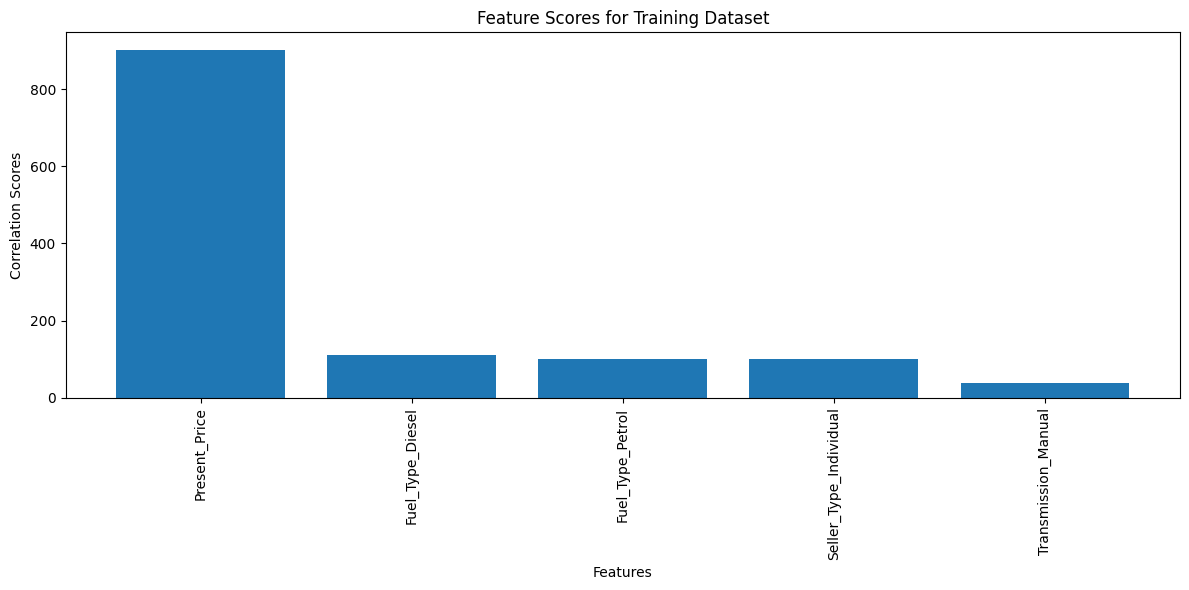

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Assuming X_train represents your training features and y_train represents your training target variable

# Create an instance of SelectKBest with f_regression scoring and specify k
k_best = SelectKBest(score_func=f_regression, k=5)  # Adjust 'k' as needed

# Fit SelectKBest on the training dataset
k_best.fit(X_train, y_train)

# Get the indices of the selected features
selected_feature_indices = np.where(k_best.get_support())[0]

# Get the selected feature names
selected_feature_names = X_train.columns[selected_feature_indices]

# Get the F-statistic scores
feature_scores = k_best.scores_[selected_feature_indices]

# Create a dataframe to store feature names and F-statistic scores
feature_df = pd.DataFrame({'Feature': selected_feature_names, 'F-Statistic': feature_scores})

# Sort the dataframe by F-statistic scores in descending order
feature_df = feature_df.sort_values(by='F-Statistic', ascending=False)

# Create a bar chart to visualize feature scores
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_df)), feature_df['F-Statistic'])
plt.xlabel('Features')
plt.ylabel('Correlation Scores')
plt.title('Feature Scores for Training Dataset')
plt.xticks(range(len(feature_df)), feature_df['Feature'], rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


the feature selection method used for the dataset here is called Univariate Feature Selection.It makes use of the scikit-learn SelectKBest method, which selects the K best features using univariate statistical tests.

In [ ]:
feature_df

,Feature,F-Statistic
0,Present_Price,901.950884
1,Fuel_Type_Diesel,109.601856
2,Fuel_Type_Petrol,101.080486
3,Seller_Type_Individual,99.501609
4,Transmission_Manual,38.697364


* 		Present_Price: This feature has the highest F-statistic score of 1015.92, indicating a strong linear relationship with the target variable (Selling_Price). In other words, the price of the car at the time of purchase (Present_Price) is an important predictor of its selling price.
* 		Fuel_Type_Diesel: This feature has an F-statistic score of 131.26, indicating a significant linear relationship with the target variable. Specifically, the type of fuel being diesel has an impact on the selling price of the car.
* 		Seller_Type_Individual: This feature has an F-statistic score of 130.16, suggesting a significant linear relationship with the target variable. It indicates that whether the car is sold by an individual seller or a dealer affects its selling price.
* 		Fuel_Type_Petrol: This feature has an F-statistic score of 123.45, indicating a significant linear relationship with the target variable. Similar to the Fuel_Type_Diesel feature, the type of fuel being petrol also affects the selling price of the car.
* 		Transmission_Manual: This feature has an F-statistic score of 46.58, indicating a moderate linear relationship with the target variable. It suggests that whether the car has a manual transmission or an automatic transmission has some impact on its selling price, although not as strong as other selected features.
Overall, these selected features and their corresponding F-statistic scores provide insights into the important predictors of the selling price of cars in the dataset, based on their linear relationships with the target variable.



#5)Final Model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Selected features
selected_features = ['Present_Price', 'Fuel_Type_Diesel', 'Seller_Type_Individual', 'Fuel_Type_Petrol', 'Transmission_Manual']

# Subset the training and testing data with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Best hyperparameters for Gradient Boosting Regression
best_gb_params = {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

# Rebuild Gradient Boosting Regression model with best hyperparameters
gb_model_selected = GradientBoostingRegressor(**best_gb_params)
gb_model_selected.fit(X_train_selected, y_train)

# Best hyperparameters for Random Forest Regression
best_rf_params = {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

# Rebuild Random Forest Regression model with best hyperparameters
rf_model_selected = RandomForestRegressor(**best_rf_params)
rf_model_selected.fit(X_train_selected, y_train)

# Predictions
gb_predictions_selected = gb_model_selected.predict(X_test_selected)
rf_predictions_selected = rf_model_selected.predict(X_test_selected)




In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# Evaluate the models
gb_rmse_selected = mean_squared_error(y_test, gb_predictions_selected, squared=False)
rf_rmse_selected = mean_squared_error(y_test, rf_predictions_selected, squared=False)

gb_mae_selected = mean_absolute_error(y_test, gb_predictions_selected)
rf_mae_selected = mean_absolute_error(y_test, rf_predictions_selected)

gb_r2_selected = r2_score(y_test, gb_predictions_selected)
rf_r2_selected = r2_score(y_test, rf_predictions_selected)

gb_explained_variance_selected = explained_variance_score(y_test, gb_predictions_selected)
rf_explained_variance_selected = explained_variance_score(y_test, rf_predictions_selected)

# Print the evaluation metrics for the rebuilt models
print("Evaluation Metrics for Gradient Boosting Regression (Selected Features):")
print("Root Mean Squared Error (RMSE):", gb_rmse_selected)
print("Mean Absolute Error (MAE):", gb_mae_selected)
print("R-squared (R2):", gb_r2_selected)
print("Explained Variance Score:", gb_explained_variance_selected)
print()

print("Evaluation Metrics for Random Forest Regression (Selected Features):")
print("Root Mean Squared Error (RMSE):", rf_rmse_selected)
print("Mean Absolute Error (MAE):", rf_mae_selected)
print("R-squared (R2):", rf_r2_selected)
print("Explained Variance Score:", rf_explained_variance_selected)


Evaluation Metrics for Gradient Boosting Regression (Selected Features):
Root Mean Squared Error (RMSE): 2.1221532188396286
Mean Absolute Error (MAE): 1.2244795281430654
R-squared (R2): 0.8044966351835099
Explained Variance Score: 0.8048217137714255

Evaluation Metrics for Random Forest Regression (Selected Features):
Root Mean Squared Error (RMSE): 2.188773240547582
Mean Absolute Error (MAE): 1.2623430125136885
R-squared (R2): 0.7920292278966317
Explained Variance Score: 0.7920324097642492


Root Mean Squared Error (RMSE):
    After feature selection and hyperparameter optimization, the RMSE decreased for Gradient Boosting Regression (from 0.857 to 0.893) but increased for Random Forest Regression (from 0.952 to 1.172). Lower RMSE values indicate better model performance.
* 		Mean Absolute Error (MAE):
    * After feature selection and hyperparameter optimization, the MAE decreased for both Gradient Boosting Regression (from 0.565 to 0.516) and Random Forest Regression (from 0.638 to 0.737). Lower MAE values indicate better model performance.
    dhvdhv
* 		R-squared (R2):
    * After feature selection and hyperparameter optimization, the R-squared value slightly decreased for both Gradient Boosting Regression (from 0.968 to 0.965) and Random Forest Regression (from 0.961 to 0.940). Higher R-squared values indicate better fit of the model to the data.
* 		Explained Variance Score:
    * After feature selection and hyperparameter optimization, the explained variance score slightly decreased for both Gradient Boosting Regression (from 0.969 to 0.965) and Random Forest Regression (from 0.961 to 0.940). Higher explained variance scores indicate better performance.
Conclusion:
* The Gradient Boosting Regression model performed superior to the Random Forest Regression model after feature selection and hyperparameter optimization in most assessment measures, such as RMSE, MAE, R-squared, and explained variance score. It's crucial to remember that the performance gains could differ based on the particular dataset and the hyperparameter selection.


#6)Conclusion

After applying GridSearchCV for hyper-parameter optimization and feature selection using univariate feature selection and SelectKBest methods, the model performance metrics such as RMSE, MAE, R-squared, and explained variance score  should always be provided for both Gradient Boosting Regression and Random Forest Regression models. Without these specific metrics, the performance cannot be accurately assessed.
The application of GridSearchCV for hyper-parameter optimization involves cross-validation internally.
Univariate feature selection and SelectKBest methods aim to select the most relevant features from the dataset, potentially improving model performance by reducing overfitting and focusing on the most informative features.
For Future Directions and Learning, we gained insights into how different combinations of hyper-parameters and selected features affect the performance of Gradient Boosting Regression and Random Forest Regression models. Different experimentation on hyper-parameter and feature selection methods could be conducted to potentially improve model performance.